In [1]:
import sys
sys.path.append("../")

In [13]:
from imgaug.augmentables.segmaps import SegmentationMapsOnImage
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
from tqdm import tqdm
import cv2 as cv
import matplotlib.pyplot as plt
import rasterio
import geopandas as gpd
import os
import numpy as np
import hydra
import torch

In [3]:
with hydra.initialize(config_path="../configs"):
    cfg = hydra.compose(
        config_name="config", 
        overrides=["datamodule.num_workers=0", "datamodule.batch_size=1", "datamodule.data_dir='data/'"]
    )

In [4]:
dm = hydra.utils.instantiate(cfg.datamodule)

In [5]:
dm.prepare_data()
dm.setup()

Preparing data...
Number of train samples: 195
Number of validation samples: 55
Number of test samples: 30


In [6]:
dataloader = dm.test_dataloader()

In [7]:
data = next(iter(dataloader))

In [8]:
img, lbl = data

In [9]:
model = hydra.utils.instantiate(cfg.model)

In [10]:
model = model.load_from_checkpoint(
    '/Users/pourheydari/Projects/SpaceNet7/logs/runs/2021-08-30/01-33-48/checkpoints/epoch_009.ckpt'
)

In [11]:
pred = model(img)

/Users/pourheydari/anaconda3/envs/sn7/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/Users/pourheydari/anaconda3/envs/sn7/lib/python3.9/site-packages/segmentation_models_pytorch/base/modules.py:104: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.activation(x)


In [12]:
pred.shape

torch.Size([1, 2, 512, 512])

In [14]:
pred_mask = torch.argmax(pred, dim=1)

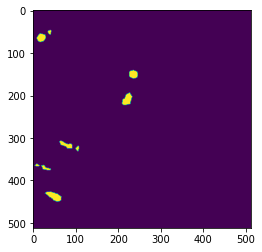

In [15]:
plt.imshow(pred_mask[0])

TypeError: Invalid shape (1, 512, 512) for image data

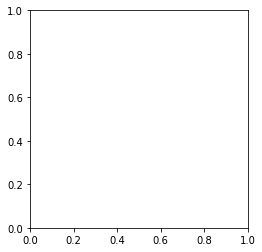

In [16]:
plt.imshow(lbl[0])